# Welcome to this lovely notebook. Here we are going go through EDA credit card fraud data.
* The [link](https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset/data?select=fraudTest.csv) to Kaggle page.


# Introduction

The dataset below contains records of financial transactions, some of which appeared to be fraudulent

<p><img src="https://camo.githubusercontent.com/9a98a7677b1607ac435316667f2c7ba7bdf34d3505ee2aa7c9484dc819543c1c/68747470733a2f2f65787465726e616c2d636f6e74656e742e6475636b6475636b676f2e636f6d2f69752f3f753d687474707325334125324625324661692d6a6f75726e65792e636f6d25324677702d636f6e74656e7425324675706c6f61647325324632303139253246303625324666726175642d454d562d636869702d6372656469742d636172642e6a706726663d31266e6f66623d31" width="700" height="400"></p>

The following project is intended to have a walk through EDA with and then predicting whether a transaction is or isn't fraudulent with several classification models.


The given dataset contains the following columns (23):

**fraudTrain.csv:**

1. **serial_number**: The unique identifier for the transaction record.
2. **trans_date_trans_time**: The date and time of the transaction.
3. **cc_num**: Credit card number.
4. **merchant**: The merchant receiving the payment.
5. **category**: The area of business that the merchant deals in.
6. **amt**: The amount of money in American dollars.
7. **first**: The first name of the cardholder.
8. **last**: The last name of the cardholder.
9. **gender**: The gender of the cardholder, classified as male or female.
10. **street**: The street address of the cardholder’s residence.
11. **city**: The city of the cardholder’s residence.
12. **state**: The state of the cardholder’s residence.
13. **zip**: The ZIP code of the cardholder’s residence.
14. **lat**: The latitude of the cardholder’s residence.
15. **long**: The longitude of the cardholder’s residence.
16. **city_pop**: The population of the city where the cardholder resides.
17. **job**: The occupation of the cardholder.
18. **dob**: The date of birth of the cardholder.
19. **trans_num**: The unique transaction ID.
20. **unix_time**: Unix time, representing the number of seconds since 1970.
21. **merch_lat**: The latitude of the merchant’s location.
22. **merch_long**: The longitude of the merchant’s location.
23. **is_fraud**: Indicates whether the transaction is fraudulent (1 for fraud,



# Goal
We need to predict which transactions are found to be fraudulent.

In order to do it, we need to conduct EDA of the above-mentioned dataset, implement all the required manupulations with data, such as: imputation and transformation, dataprocessing in order to have data prepared for modeling.
Then implementing classification with several models (XGBoost, LightGBM, CatBoost, LogisticRegression).

# The project will consist of the following parts (the following notebook contains EDA only):

1. Conducting EDA with documenting what we have in our data
2. Data preparation
3. Feature Selection
4. Feature Engineering
5. Modeling


In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)


# Visualization - Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.ticker import ScalarFormatter
from datetime import datetime

## 1. EDA

In [2]:
#Let's first read the file
credit_cards = pd.read_csv('fraudTrain.csv',  index_col=0)
credit_cards_test = pd.read_csv('fraudTest.csv', index_col=0)

In [3]:
credit_cards.shape

(1296675, 22)

In [4]:
credit_cards.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [5]:
# From the first sight there are no null values, but we'll take a look at it later, we have 1296675 rows and 23 columns
credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [6]:
# The base check shows no null values
credit_cards.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# Descriptive statistics for numerical columns
numerical_summary = credit_cards.describe()

# Frequency distribution for categorical variables
categorical_summary = credit_cards.describe(include=['object'])

In [8]:
numerical_summary

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# After taking a look at the categorical columns we see 'none' in NumberOfSuppliments column, but we'll check the rest too.
categorical_summary

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [10]:
numerical_features = credit_cards.select_dtypes(include=['int64', 'float64'])
categorical_features = credit_cards.select_dtypes(include=['object', 'category'])

print("Numerical Features:", numerical_features.columns.tolist())
print("Categorical Features:", categorical_features.columns.tolist())

Numerical Features: ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
Categorical Features: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


## 1.1 Numerical columns

### 1.1.1 is_fraud (aka Target)

In [11]:
# 2 Unique values
credit_cards['is_fraud'].nunique()

2

In [12]:
# 1 and 0
credit_cards['is_fraud'].unique()

array([0, 1], dtype=int64)

In [13]:
credit_cards['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

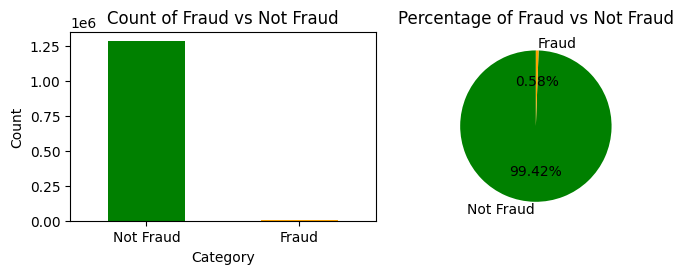

In [14]:
# Count values
count_fraud = credit_cards['is_fraud'].value_counts().sort_index()
labels = ['Not Fraud', 'Fraud']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
count_fraud.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Fraud vs Not Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
count_fraud.plot(kind='pie', labels=labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of Fraud vs Not Fraud')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### Observations
1. There is 0.58% fraud in this dataset (7506 out of M1.28 transactions)
2. We are dealing with imbalanced data

### 1.1.2 cc_num

In [15]:
# We have 983 unique credit cards
credit_cards['cc_num'].nunique()

983

In [16]:
credit_cards['cc_num'].unique()

array([   2703186189652095,        630423337322,      38859492057661,
          3534093764340240,     375534208663984,    4767265376804500,
            30074693890476,    6011360759745864,    4922710831011201,
          2720830304681674,       4642894980163,     377234009633447,
           180042946491150,    5559857416065248,    3514865930894695,
          6011999606625827,    6011860238257910,    3565423334076143,
          2348245054386329, 4956828990005111019, 4469777115158234880,
          2305336922781618,     180048185037117,        630441765090,
       4428780983793657331,     343464013864032,     374930071163758,
          4334230547694630, 4225990116481262579,    4260059589824237,
           180094608895855, 4599735407877245080,        630412733309,
          2712209726293386,     374125201044065,     349612764943496,
          3598215285024754,     213141712584544,      30561214688470,
          4789911625179723,        676372984911,      30011465039817,
          4642255475

In [17]:
# it would be possible to extract issuers or card brands but since there are different lengths of cards,
# especially 11 or such, it is unlikely it's possible
credit_cards['cc_num'].astype(str).apply(len).unique()

array([16, 12, 14, 15, 13, 19, 11], dtype=int64)

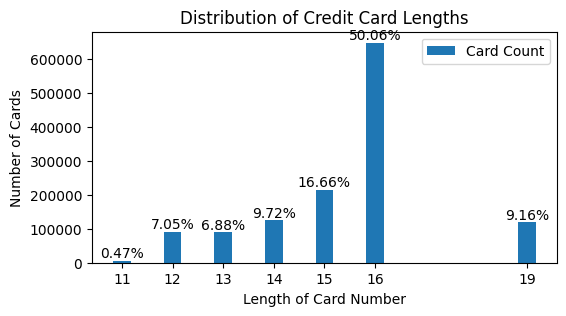

In [18]:
# Assuming the column with credit card numbers is 'cc_num'
# Convert to string, calculate lengths, and count occurrences per length
card_lengths = credit_cards['cc_num'].astype(str).apply(len)
card_count_per_length = card_lengths.value_counts().sort_index()

# Calculate the percentage of each card length
total_cards = card_count_per_length.sum()
percentages = (card_count_per_length / total_cards) * 100

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Define the bar width and positions
bar_width = 0.35
index = card_count_per_length.index

# Create the bar chart
bar1 = ax.bar(index, card_count_per_length, bar_width, label='Card Count')

# Add labels and title
ax.set_xlabel('Length of Card Number')
ax.set_ylabel('Number of Cards')
ax.set_title('Distribution of Credit Card Lengths')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

# Add percentage labels above the bars
for i, (count, percentage) in enumerate(zip(card_count_per_length, percentages)):
    ax.text(index[i], count, f'{percentage:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

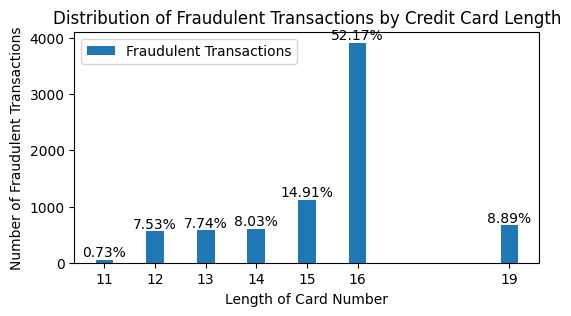

In [19]:
# Assuming the column with credit card numbers is 'cc_num' and 'is_fraud' for fraud detection
# Filter for fraudulent transactions
fraudulent_transactions = credit_cards[credit_cards['is_fraud'] == 1]

# Convert to string, calculate lengths, and count occurrences per length for fraudulent transactions
fraud_card_lengths = fraudulent_transactions['cc_num'].astype(str).apply(len)
fraud_count_per_length = fraud_card_lengths.value_counts().sort_index()

# Calculate the percentage of each card length
total_fraud_cards = fraud_count_per_length.sum()
fraud_percentages = (fraud_count_per_length / total_fraud_cards) * 100

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Define the bar width and positions
bar_width = 0.35
index = fraud_count_per_length.index

# Create the bar chart
bar1 = ax.bar(index, fraud_count_per_length, bar_width, label='Fraudulent Transactions')

# Add labels and title
ax.set_xlabel('Length of Card Number')
ax.set_ylabel('Number of Fraudulent Transactions')
ax.set_title('Distribution of Fraudulent Transactions by Credit Card Length')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

# Add percentage labels above the bars
for i, (count, percentage) in enumerate(zip(fraud_count_per_length, fraud_percentages)):
    ax.text(index[i], count, f'{percentage:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()


In [20]:
# Group by card number and calculate total transactions and fraud transactions
result = credit_cards.groupby('cc_num').agg(
    total_transactions=('cc_num', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Sort by number of fraud transactions in descending order
result_sorted = result.sort_values(by='fraud_transactions', ascending=False)

# Display the result
result_sorted.head(10)

,cc_num,total_transactions,fraud_transactions
483,3520550088202337,989,19
118,4593569795412,19,19
96,4260128500325,1466,18
767,4874006077381178,516,16
549,3556613125071656,2556,16
588,3576021480694169,2527,16
586,3575540972310993,1542,16
927,4400011257587661852,2030,16
157,30074693890476,2057,16
821,6011366578560244,2060,16


In [21]:
# Count how many rows have 'fraud_transactions' greater than 0
non_zero_fraud_count = result_sorted[result_sorted['fraud_transactions'] > 0].shape[0]

# Display the count
print(non_zero_fraud_count)

762


#### Observations
1. There are 983 unique cards
2. There are 7 lengths of cards
3. It is unlikely possible to indicate what brach each card is as there are no cards with 11 digits on it
4. It seems like this feature is quite not useful
5. It looks like the general distribution of transactions per length of card number is similar to distribution of fraud per length of card number
6. 762 out of 983 cards had at least 1 fraudulent transaction

### 1.1.2.1 Checking if there are the same credit cards in test which exist in train

In [22]:
#Let's take a look at the situation with cards
def find_credit_card_intersection(df1, df2, card_column):
    # Step 1: Ensure the credit card numbers are in the same format (e.g., string or int)
    df1[card_column] = pd.to_numeric(df1[card_column], errors='coerce')
    df2[card_column] = pd.to_numeric(df2[card_column], errors='coerce')
    
    # Step 2: Extract the unique credit card numbers from both datasets
    cards_df1 = set(df1[card_column].dropna().unique())
    cards_df2 = set(df2[card_column].dropna().unique())
    
    # Step 3: Find the intersection (cards that appear in both datasets)
    intersection = cards_df1.intersection(cards_df2)
    
     # Step 4: Find the difference (cards in df2 that are not in df1)
    difference = cards_df2.difference(cards_df1)
    
    # Step 5: Return the counts and the card numbers for both
    return {
        "matching_count": len(intersection),
        "non_matching_count": len(difference),
        "non_matching_cards": difference
    }

In [23]:
find_credit_card_intersection(credit_cards, credit_cards_test, 'cc_num')

{'matching_count': 908,
 'non_matching_count': 16,
 'non_matching_cards': {503851367360,
  586100864972,
  4295296907373,
  4883407061576,
  180020605265701,
  180052752563109,
  180098888332620,
  347399333635231,
  372965408103277,
  2242176657877538,
  3540416671210051,
  3550412175018089,
  3588001568691267,
  4087542780207162,
  4417677808209716,
  4352307151555405069}}

In [24]:
#Takinga look at the transactions with non matching cards
credit_cards_test[credit_cards_test['cc_num'].isin([503851367360,
  586100864972,
  4295296907373,
  4883407061576,
  180020605265701,
  180052752563109,
  180098888332620,
  347399333635231,
  372965408103277,
  2242176657877538,
  3540416671210051,
  3550412175018089,
  3588001568691267,
  4087542780207162,
  4417677808209716,
  4352307151555405069])].groupby(['cc_num', 'is_fraud'])['is_fraud'].count()
# so we see that the cards from test which had no matching with the cards from train are all fraudulent

cc_num               is_fraud
503851367360         1           10
586100864972         1           12
4295296907373        1            6
4883407061576        1            9
180020605265701      1           12
180052752563109      1           12
180098888332620      1           12
347399333635231      1           10
372965408103277      1           10
2242176657877538     1           10
3540416671210051     1            8
3550412175018089     1           11
3588001568691267     1           14
4087542780207162     1            9
4417677808209716     1           11
4352307151555405069  1            7
Name: is_fraud, dtype: int64

### 1.1.2.2 Let's take a look at fraud rates per cards and see what we have there

In [25]:
def calculate_fraud_rate_per_card(df, df1, card_column, fraud_column):
    # Step 1: Group by the credit card number and calculate total transactions and fraudulent transactions
    grouped = df.groupby(card_column).agg(
        total_transactions=(fraud_column, 'size'),  # Count total transactions per card
        fraudulent_transactions=(fraud_column, 'sum')  # Sum of fraudulent transactions per card
    )
    
    # Step 2: Calculate the fraud rate (fraudulent transactions / total transactions)
    grouped['fraud_rate'] = grouped['fraudulent_transactions'] / grouped['total_transactions']
    
    # Step 3: join the cards from the test set to check the fraud situation
    unique_df = pd.DataFrame(list(set(df1[card_column].unique())), columns=['cc_num'])
    grouped = grouped.merge(unique_df, on='cc_num', how='left', indicator=True)
    
    # Step 4: Return a DataFrame with unique card numbers and their fraud rates
    return grouped.reset_index()

fraud_rate_df = calculate_fraud_rate_per_card(credit_cards, credit_cards_test, 'cc_num', 'is_fraud')

In [26]:
fraud_rate_df.sort_values(by='fraud_rate', ascending=False)

#After examining the file, with joins, it was seen that there were 76 cards with 100% fraud
#and a low number of transactions


,index,cc_num,total_transactions,fraudulent_transactions,fraud_rate,_merge
682,682,4318414072191879,9,9,1.0,left_only
141,141,4844243189971,10,10,1.0,left_only
82,82,4076173495454,12,12,1.0,left_only
532,532,3545578418030657,7,7,1.0,left_only
915,915,4257110907449569602,10,10,1.0,left_only
...,...,...,...,...,...,...
389,389,378006354724784,514,0,0.0,both
799,799,5359543825610251,2043,0,0.0,both
386,386,377834944388609,495,0,0.0,both
801,801,5410056176712193,490,0,0.0,both


### 1.1.3 amt

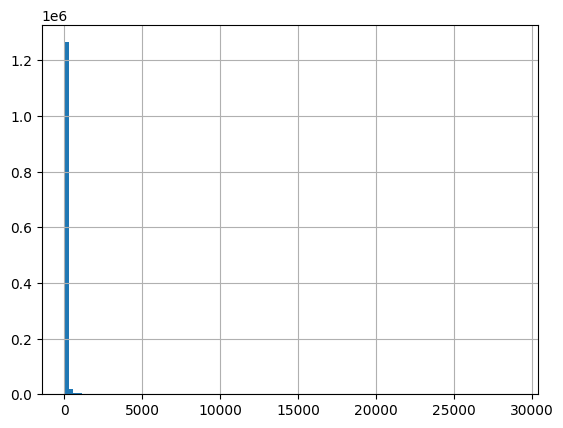

In [27]:
# We see that most of the amounts are small ones
credit_cards['amt'].hist(bins = 100)
plt.show()

In [28]:
print(credit_cards['amt'].max())
print(credit_cards['amt'].min())

28948.9
1.0


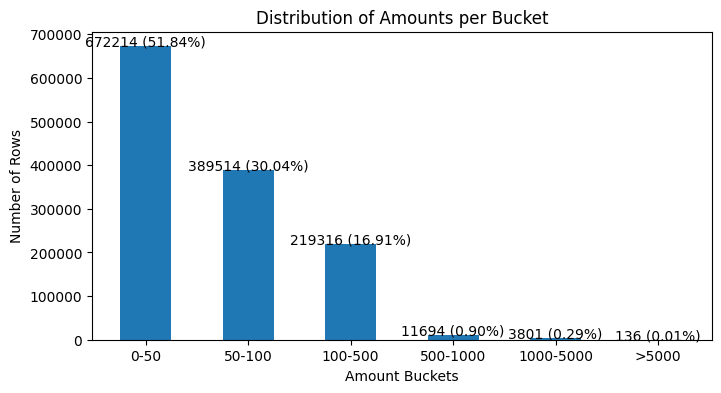

In [29]:
# Assuming 'amounts' is your column name
amounts = credit_cards['amt']

# Define the bins and corresponding labels
bins = [0, 50, 100, 500, 1000, 5000, float('inf')]
labels = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '>5000']

# Create a new column with the binned amounts
credit_cards['AmountBucket'] = pd.cut(amounts, bins=bins, labels=labels, right=False)

# Count how many rows fall into each bucket and calculate the percentage
bucket_counts = credit_cards['AmountBucket'].value_counts(sort=False)
bucket_percentages = (bucket_counts / bucket_counts.sum()) * 100

# Plotting the histogram
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart with counts
ax.bar(bucket_counts.index, bucket_counts.values, width=0.5)

# Add labels and title
ax.set_xlabel('Amount Buckets')
ax.set_ylabel('Number of Rows')
ax.set_title('Distribution of Amounts per Bucket')

# Display the percentages above the bars
for i, v in enumerate(bucket_counts.values):
    percentage = bucket_percentages.values[i]
    ax.text(i, v + 0.5, f'{v} ({percentage:.2f}%)', ha='center')

# Display the plot
plt.show()

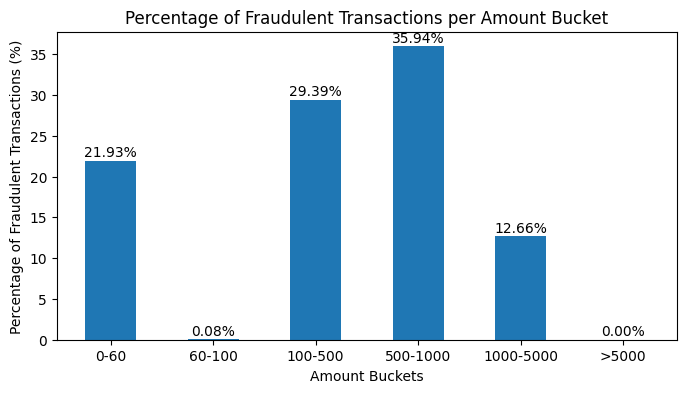

In [30]:
# Assuming 'amt' is your amounts column and 'fraud' indicates if it's fraud (1 for fraud, 0 for non-fraud)
amounts = credit_cards['amt']

# Define the bins and corresponding labels
bins = [0, 60, 100, 500, 1000, 5000, float('inf')]
labels = ['0-60', '60-100', '100-500', '500-1000', '1000-5000', '>5000']

# Create a new column with the binned amounts
credit_cards['AmountBucket'] = pd.cut(amounts, bins=bins, labels=labels, right=False)

# Count how many fraud cases in each bucket
fraud_counts = credit_cards[credit_cards['is_fraud'] == 1]['AmountBucket'].value_counts(sort=False)

# Calculate the percentage of fraud transactions in each bucket
total_fraud = fraud_counts.sum()
fraud_percentages = (fraud_counts / total_fraud) * 100

# Plotting the bar chart for fraud percentages
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart
ax.bar(fraud_percentages.index, fraud_percentages.values, width=0.5)

# Add labels and title
ax.set_xlabel('Amount Buckets')
ax.set_ylabel('Percentage of Fraudulent Transactions (%)')
ax.set_title('Percentage of Fraudulent Transactions per Amount Bucket')

# Display percentages on the bars
for i, v in enumerate(fraud_percentages.values):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center')

# Display the plot
plt.show()


#### Observations
1. Most of the transactions are done with small amounts (0-50), almost 52 percent, up to 100$ it is 82% of total tnxns
2. Fraud is distributed slightly different. Almost 36% is taken up by 500-1000 bucket, 29.39% of fraud is taken up by 100-500 bucket, 21.41% is taken up by 0-50 and 12.66% is taken up by 1000-5000 bucket. 50-100 takes up 0.6% of fraud and >5000 bucket is not fraudulent

### 1.1.4 city_pop

In [31]:
# We have 879 unque values in this column
credit_cards['city_pop'].nunique()

879

In [32]:
# so it is a bit weird to see city_pop of 23 citizens
print(credit_cards['city_pop'].min())
print(credit_cards['city_pop'].max())

23
2906700


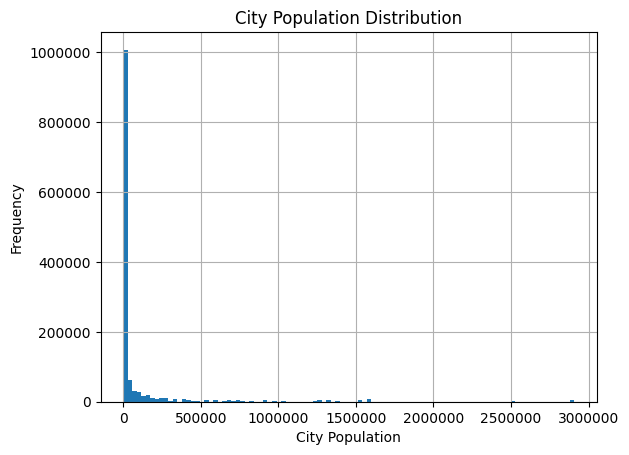

In [33]:
# Plot the histogram
ax = credit_cards['city_pop'].hist(bins=100)

# Force the y-axis to use regular numbers
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')  # This forces plain style (no scientific notation)
ax.ticklabel_format(style='plain', axis='x')

# Add labels and title
ax.set_xlabel('City Population')
ax.set_ylabel('Frequency')
ax.set_title('City Population Distribution')

# Show the plot
plt.show()

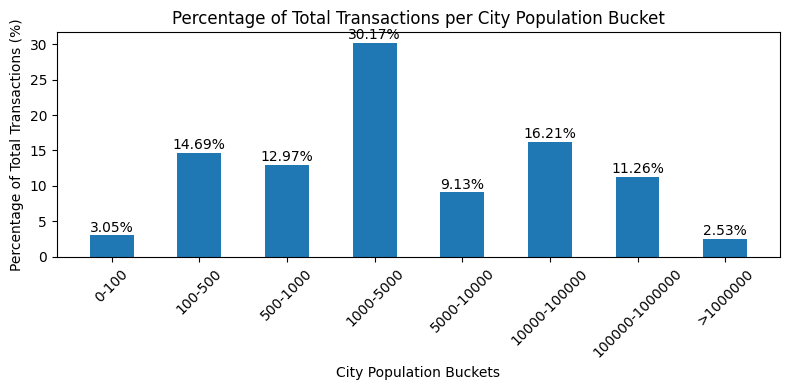

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'city_pop' is the population column
pop = credit_cards['city_pop']

# Define the bins and corresponding labels
bins = [0, 100, 500, 1000, 5000, 10000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-100000', '100000-1000000', '>1000000']

# Create a new column with the binned population
credit_cards['city_pop_bucket'] = pd.cut(pop, bins=bins, labels=labels, right=False)

# Count how many total transactions in each bucket (without filtering for fraud)
total_counts = credit_cards['city_pop_bucket'].value_counts(sort=False)

# Calculate the percentage of total transactions in each bucket
total_transactions = total_counts.sum()
total_percentages = (total_counts / total_transactions) * 100

# Plotting the bar chart for total percentages
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart
ax.bar(total_percentages.index, total_percentages.values, width=0.5)

# Add labels and title
ax.set_xlabel('City Population Buckets')
ax.set_ylabel('Percentage of Total Transactions (%)')
ax.set_title('Percentage of Total Transactions per City Population Bucket')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display percentages on the bars
for i, v in enumerate(total_percentages.values):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


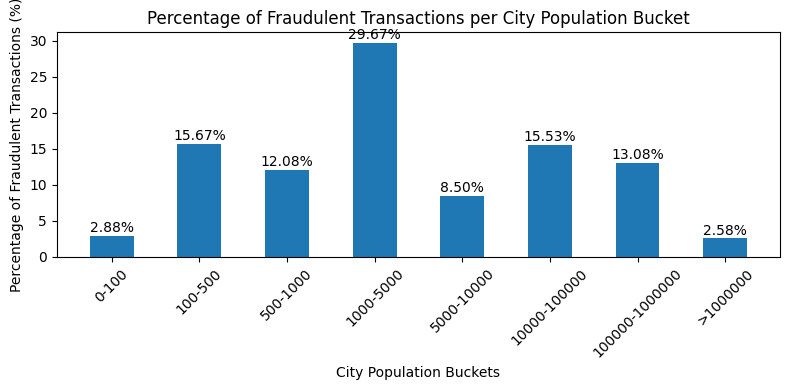

In [35]:
# Assuming 'city_pop' is the population column and 'is_fraud' indicates if it's fraud (1 for fraud, 0 for non-fraud)
pop = credit_cards['city_pop']

# Define the bins and corresponding labels
bins = [0, 100, 500, 1000, 5000, 10000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-100000', '100000-1000000', '>1000000']

# Create a new column with the binned population
credit_cards['city_pop_bucket'] = pd.cut(pop, bins=bins, labels=labels, right=False)

# Count how many fraud cases in each bucket
fraud_counts = credit_cards[credit_cards['is_fraud'] == 1]['city_pop_bucket'].value_counts(sort=False)

# Calculate the percentage of fraud transactions in each bucket
total_fraud = fraud_counts.sum()
fraud_percentages = (fraud_counts / total_fraud) * 100

# Plotting the bar chart for fraud percentages
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart
ax.bar(fraud_percentages.index, fraud_percentages.values, width=0.5)

# Add labels and title
ax.set_xlabel('City Population Buckets')
ax.set_ylabel('Percentage of Fraudulent Transactions (%)')
ax.set_title('Percentage of Fraudulent Transactions per City Population Bucket')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Display percentages on the bars
for i, v in enumerate(fraud_percentages.values):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center')

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

#### Observations
1. Most of the transactions are conducted by citizens of small towns, 60% tnxnx conducted in the cities up to 5000 inhabitans
2. The distribution of fraud in % and num of transactions in % look similar (per chosen buckets)

### 1.1.5 Latitude/longitude redundant may be

### 1.1.6 Merchant Latitude/longitude (the location of the merchant can be extracted)

### 1.1.7 ZIP

In [36]:
credit_cards[['city_pop','zip', 'city', 'state']].head()

,city_pop,zip,city,state
0,3495,28654,Moravian Falls,NC
1,149,99160,Orient,WA
2,4154,83252,Malad City,ID
3,1939,59632,Boulder,MT
4,99,24433,Doe Hill,VA


In [37]:
# Group by card zip and calculate total transactions and fraud transactions
zip_nums = credit_cards.groupby('zip').agg(
    total_transactions=('zip', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Sort by number of fraud transactions in descending order
zip_nums = zip_nums.sort_values(by='fraud_transactions', ascending=False)

print(len(zip_nums))
# Display the result
zip_nums.head()

970


,zip,total_transactions,fraud_transactions
129,15010,1579,24
492,48088,3597,23
853,82514,3527,21
149,16034,2551,21
699,68375,19,19


In [38]:
# Count how many rows have 'fraud_transactions' greater than 0
non_zero_fraud_count_zip = zip_nums[zip_nums['fraud_transactions'] > 0].shape[0]

# Display the count
print(non_zero_fraud_count_zip)

754


#### Observations
1. There are 970 unique zip codes
2. 754 zip codes with at lease 1 fradulent transaction
3. this column is unlikely to be useful

### 1.1.8 unix_time seems to be redundant

In [39]:
#Let's check if unix_time is equal to transaction_date column
def count_equal_datetime_unix(df, datetime_col, unix_col):
    # Step 1: Convert the 'datetime' column to actual datetime objects
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    
    # Step 2: Convert the 'unix_time' column to datetime objects
    df[unix_col] = pd.to_datetime(df[unix_col], unit='s')
    
    # Step 3: Count how many rows have equal values in both columns
    equal_count = (df[datetime_col] == df[unix_col]).sum()
    
    return equal_count


In [40]:
count_equal_datetime_unix(credit_cards, 'trans_date_trans_time', 'unix_time')

0

In [41]:
credit_cards.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,AmountBucket,city_pop_bucket
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,2013-06-21 12:12:08,36.841266,-111.690765,0,0-60,100-500
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,2013-06-21 12:12:19,38.906881,-78.246528,0,0-60,100-500
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,2013-06-21 12:12:32,33.619513,-105.130529,0,100-500,500-1000
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,2013-06-21 12:13:36,42.788940,-103.241160,0,60-100,1000-5000
1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,2013-06-21 12:13:37,46.565983,-114.186110,0,0-60,100-500


## 1.2 Categorical columns

In [42]:
print("Categorical Features:", categorical_features.columns.tolist())

Categorical Features: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


### 1.2.1 merchant

In [43]:
#we have 693 unique merchants
credit_cards['merchant'].nunique()

693

In [44]:
# Group by card number and calculate total transactions and fraud transactions
merchant_nums = credit_cards.groupby('merchant').agg(
    total_transactions=('merchant', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Sort by number of fraud transactions in descending order
merchants_nums = merchant_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
merchants_nums.head(5)

,merchant,total_transactions,fraud_transactions
494,fraud_Rau and Sons,2490,49
337,fraud_Kozey-Boehm,1866,48
105,fraud_Cormier LLC,3649,48
645,fraud_Vandervort-Funk,2474,47
146,fraud_Doyle Ltd,2558,47


In [45]:
# Count how many rows have 'fraud_transactions' greater than 0
non_zero_fraud_count_merchant = merchants_nums[merchants_nums['fraud_transactions'] > 0].shape[0]

# Display the count
print(non_zero_fraud_count_merchant)

679


#### Observations
1. We have 693 unique merchants
2. 679 out of 693 merchants had at least 1 fraudulent transaction

### 1.2.2 Category

In [46]:
#we have 14 unique merchants
credit_cards['category'].nunique()

14

In [47]:
# Group by category and calculate total transactions and fraud transactions
category_nums = credit_cards.groupby('category').agg(
    total_transactions=('category', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate total transactions and total fraud across all categories
total_tnxns = category_nums['total_transactions'].sum()
total_frauds = category_nums['fraud_transactions'].sum()

# Add columns for the percentage of total transactions and fraud transactions
category_nums['percentage_total_transactions'] = round(category_nums['total_transactions'] / total_tnxns, 2)
category_nums['percentage_fraud_transactions'] = round(category_nums['fraud_transactions'] / total_frauds, 2)

# Sort by number of fraud transactions in descending order
category_nums = category_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
category_nums.head(14)

,category,total_transactions,fraud_transactions,percentage_total_transactions,percentage_fraud_transactions
4,grocery_pos,123638,1743,0.10,0.23
11,shopping_net,97543,1713,0.08,0.23
8,misc_net,63287,915,0.05,0.12
12,shopping_pos,116672,843,0.09,0.11
2,gas_transport,131659,618,0.10,0.08
9,misc_pos,79655,250,0.06,0.03
7,kids_pets,113035,239,0.09,0.03
0,entertainment,94014,233,0.07,0.03
10,personal_care,90758,220,0.07,0.03
6,home,123115,198,0.09,0.03


#### Observations
1. We have 14 unique categories
2. There are some categories that can be united like grocery_pos and grocery_net, shopping_net and shoping_pos
3. Top 5 categories by fraud (grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport) take up 42% by count of tnxns

### 1.2.3 Gender

In [48]:
#we have 14 unique merchants
credit_cards['gender'].nunique()

2

In [49]:
# Group by gender and calculate total transactions and fraud transactions
gender_nums = credit_cards.groupby('gender').agg(
    total_transactions=('gender', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate total transactions and total fraud across all categories
total_tnxns = gender_nums['total_transactions'].sum()
total_frauds = gender_nums['fraud_transactions'].sum()

# Add columns for the percentage of total transactions and fraud transactions
gender_nums['percentage_total_transactions'] = round(gender_nums['total_transactions'] / total_tnxns, 2)
gender_nums['percentage_fraud_transactions'] = round(gender_nums['fraud_transactions'] / total_frauds, 2)

# Sort by number of fraud transactions in descending order
gender_nums = gender_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
gender_nums.head(14)

,gender,total_transactions,fraud_transactions,percentage_total_transactions,percentage_fraud_transactions
1,M,586812,3771,0.45,0.5
0,F,709863,3735,0.55,0.5


#### Observations
1. 2 genders
2. Females conducted 55% f total transactions, however the distribution of fruad is 50/50

### 1.2.4 job

In [50]:
#we have 494 unique jobs
credit_cards['job'].nunique()

494

In [51]:
# Group by job and calculate total transactions and fraud transactions
job_nums = credit_cards.groupby('job').agg(
    total_transactions=('job', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate total transactions and total fraud across all categories
total_tnxns = job_nums['total_transactions'].sum()
total_frauds = job_nums['fraud_transactions'].sum()

# Add columns for the percentage of total transactions and fraud transactions
job_nums['percentage_total_transactions'] = round(job_nums['total_transactions'] / total_tnxns, 2)
job_nums['percentage_fraud_transactions'] = round(job_nums['fraud_transactions'] / total_frauds, 2)

# Sort by number of fraud transactions in descending order
job_nums = job_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
job_nums.head()

,job,total_transactions,fraud_transactions,percentage_total_transactions,percentage_fraud_transactions
286,Materials engineer,8270,62,0.01,0.01
477,Trading standards officer,4641,56,0.00,0.01
308,Naval architect,8684,53,0.01,0.01
187,Exhibition designer,9199,51,0.01,0.01
439,"Surveyor, land/geomatics",8680,50,0.01,0.01


In [52]:
# Count how many rows have 'fraud_transactions' greater than 0
non_zero_fraud_count_job = job_nums[job_nums['fraud_transactions'] > 0].shape[0]

# Display the count
print(non_zero_fraud_count_job)

443


#### Observations
1. 494 unique jobs
2. in 443 out of 493 jobs fraud was found
3. It looks like job isn't the best indicator of fraud

### 1.2.5 state

In [53]:
#we have 51 unique state
credit_cards['state'].nunique()

51

In [54]:
# Group by state and calculate total transactions and fraud transactions
state_nums = credit_cards.groupby('state').agg(
    total_transactions=('state', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate total transactions and total fraud across all categories
total_tnxns = state_nums['total_transactions'].sum()
total_frauds = state_nums['fraud_transactions'].sum()

# Add columns for the percentage of total transactions and fraud transactions
state_nums['percentage_total_transactions'] = round(state_nums['total_transactions'] / total_tnxns, 2)
state_nums['percentage_fraud_transactions'] = round(state_nums['fraud_transactions'] / total_frauds, 2)

# Sort by number of fraud transactions in descending order
state_nums = state_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
state_nums.head(51)

,state,total_transactions,fraud_transactions,percentage_total_transactions,percentage_fraud_transactions
34,NY,83501,555,0.06,0.07
43,TX,94876,479,0.07,0.06
38,PA,79847,458,0.06,0.06
4,CA,56360,326,0.04,0.04
35,OH,46480,321,0.04,0.04
9,FL,42671,281,0.03,0.04
14,IL,43252,248,0.03,0.03
22,MI,46154,238,0.04,0.03
1,AL,40989,215,0.03,0.03
23,MN,31714,207,0.02,0.03


#### Observations
1. 51 unique state
2. There is fraud in each state
3. basically fraud is always proportionate to the number of transactions (more tnxns - more fraud) nothing outstanding

### 1.2.6 city

In [55]:
#we have 894 unique state
credit_cards['city'].nunique()

894

In [56]:
# Group by city and calculate total transactions and fraud transactions
city_nums = credit_cards.groupby('city').agg(
    total_transactions=('city', 'count'),
    fraud_transactions=('is_fraud', 'sum')
).reset_index()

# Calculate total transactions and total fraud across all categories
total_tnxns = city_nums['total_transactions'].sum()
total_frauds = city_nums['fraud_transactions'].sum()

# Add columns for the percentage of total transactions and fraud transactions
city_nums['percentage_total_transactions'] = round(city_nums['total_transactions'] / total_tnxns, 2)
city_nums['percentage_fraud_transactions'] = round(city_nums['fraud_transactions'] / total_frauds, 2)

# Sort by number of fraud transactions in descending order
city_nums = city_nums.sort_values(by='fraud_transactions', ascending=False)

# Display the result
city_nums.head(10)

,city,total_transactions,fraud_transactions,percentage_total_transactions,percentage_fraud_transactions
359,Houston,4168,39,0.0,0.01
837,Warren,4599,33,0.0,0.00
554,Naples,4155,29,0.0,0.00
368,Huntsville,3560,29,0.0,0.00
806,Topeka,3028,27,0.0,0.00
193,Dallas,3629,27,0.0,0.00
810,Tulsa,3086,27,0.0,0.00
212,Detroit,3584,26,0.0,0.00
725,San Antonio,5130,25,0.0,0.00
676,Randolph,1542,25,0.0,0.00


In [57]:
# Count how many rows have 'fraud_transactions' greater than 0
non_zero_fraud_count_city = city_nums[city_nums['fraud_transactions'] > 0].shape[0]

# Display the count
print(non_zero_fraud_count_city)

702


#### Observations
1. 894 unique cities
2. 702 cities with at least one fradulent tnxn
3. The distribution of fraud is quite sparse

### 1.2.7 trans_num not relevant

### 1.2.8 dob

In [58]:
# Creating a new column with age
# Convert dob column to datetime
credit_cards['dob_datetime'] = pd.to_datetime(credit_cards['dob'])

# Calculate age
current_date = datetime.now()
credit_cards['age'] =credit_cards['dob_datetime'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

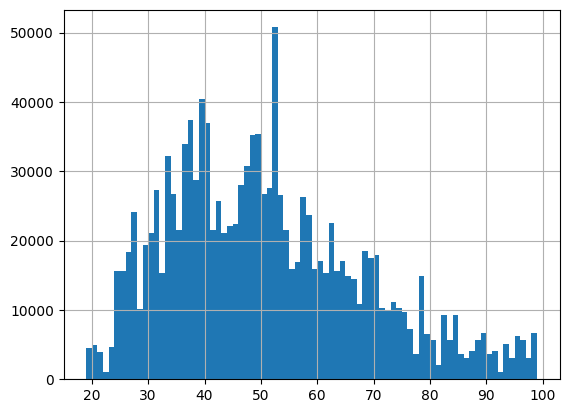

In [59]:
credit_cards.age.hist(bins=80)
plt.show()

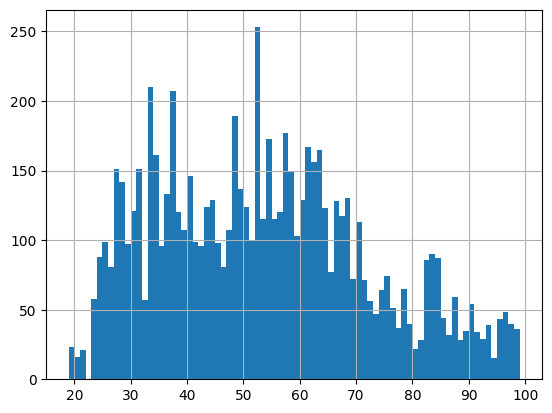

In [60]:
credit_cards_fraud_age = credit_cards[credit_cards['is_fraud']==1]
credit_cards_fraud_age.age.hist(bins=80)
plt.show()

In [61]:
print(credit_cards['age'].min())
print(credit_cards['age'].max())

19
99


#### Observations
1. So we see there are certain ages that conduct many purchases
2. There are certain ages that conduct a lot of fraud, so it won't help to unite ages into bins (at the moment)

### 1.2.9 trans_date_trans_time

In [62]:
credit_cards.head(1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,AmountBucket,city_pop_bucket,dob_datetime,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0,0-60,1000-5000,1988-03-09,36


#### we will take a look at a few new features that we can create out of datetime of the transaction

#### 1.2.9.1 Hour

In [63]:
# let's convert trans_date_trans_time into datetime column
credit_cards['trans_date_trans_time'] = pd.to_datetime(credit_cards['trans_date_trans_time'])

In [64]:
# we'll start with hour
credit_cards['hour'] = credit_cards['trans_date_trans_time'].dt.hour

Text(0, 0.5, 'number of transactions')

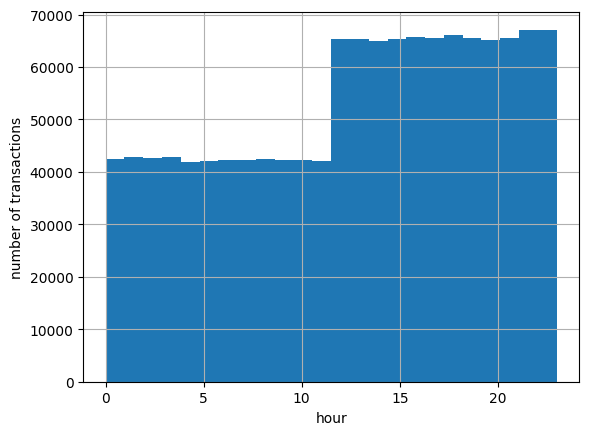

In [96]:
credit_cards['hour'].hist(bins=24)
plt.xlabel('hour')  # Label for the x-axis
plt.ylabel('number of transactions')

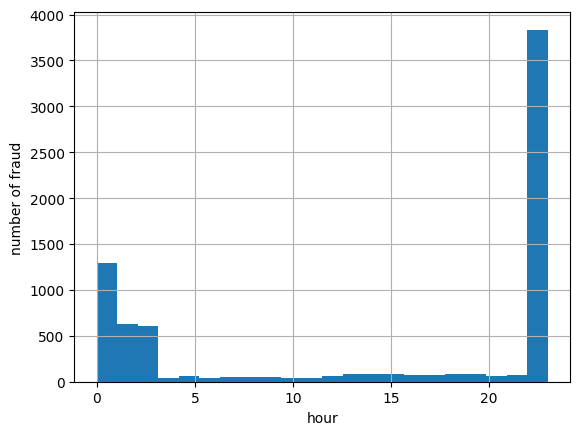

In [97]:
fraud_hour = credit_cards[credit_cards['is_fraud']==1]

fraud_hour.hour.hist(bins=22)
plt.xlabel('hour')  # Label for the x-axis
plt.ylabel('number of fraud')
plt.show()                

In [67]:
hourly_fruad = fraud_hour.groupby('hour')['is_fraud'].count().sort_values(ascending=False).to_frame()
hourly_fruad['percent_of_total'] = hourly_fruad['is_fraud'].apply(lambda x: x/hourly_fruad['is_fraud'].sum())
hourly_fruad['percent_of_total_cumulative'] = hourly_fruad['percent_of_total'].cumsum()
hourly_fruad.head(7)

,is_fraud,percent_of_total,percent_of_total_cumulative
hour,,,
22,1931,0.257261,0.257261
23,1904,0.253664,0.510925
1,658,0.087663,0.598588
0,635,0.084599,0.683187
2,625,0.083267,0.766454
3,609,0.081135,0.847589
14,86,0.011458,0.859046


#### Observations
1. The distribution of hours shows us that there are 2 phases of purchasing, one is from 00:00 to 12:00 and from 12:00 to 00:00
2. When looking at the distribution of fraud per hour we see that most of the fraud is conducted between 22:00 and 3:00 (almost 85%)

#### 1.2.9.2 Day of Week

In [68]:
credit_cards['day_of_week'] = credit_cards['trans_date_trans_time'].dt.day_name()

In [69]:
day_of_week = credit_cards.groupby('day_of_week')['day_of_week'].count().to_frame()
day_of_week['count_fraud'] = credit_cards[credit_cards['is_fraud']==1].groupby('day_of_week')['day_of_week'].count().to_frame()
day_of_week['percent_of_total_tnxns'] = day_of_week['day_of_week'].\
                    apply(lambda x: x/day_of_week['day_of_week'].sum())

day_of_week['percent_of_total_fraud'] = day_of_week['count_fraud'].\
                    apply(lambda x: x/day_of_week['count_fraud'].sum())

day_of_week.sort_values(by='count_fraud', ascending=False, inplace=True)
day_of_week['cum_sum_fraud'] = day_of_week['percent_of_total_fraud'].cumsum()
day_of_week['cum_sum_total_tnxns_percent'] = day_of_week['percent_of_total_tnxns'].cumsum()
day_of_week

,day_of_week,count_fraud,percent_of_total_tnxns,percent_of_total_fraud,cum_sum_fraud,cum_sum_total_tnxns_percent
day_of_week,,,,,,
Saturday,200957,1227,0.154979,0.163469,0.163469,0.154979
Sunday,250579,1216,0.193247,0.162004,0.325473,0.348226
Monday,254282,1182,0.196103,0.157474,0.482947,0.544329
Friday,152272,1079,0.117433,0.143752,0.626699,0.661762
Thursday,147285,1008,0.113587,0.134293,0.760991,0.775348
Tuesday,160227,935,0.123568,0.124567,0.885558,0.898916
Wednesday,131073,859,0.101084,0.114442,1.000000,1.000000


#### Observations
1. It looks like the weekend takes up 34.8% of all transactions, along with Monday it is 54.4%
2. In terms of fraud the weekend is still most fraudulent with Monday, they take up 48.3% of fraud

#### 1.2.9.3 Day of Month

In [70]:
credit_cards['day_of_month'] = credit_cards['trans_date_trans_time'].dt.day

In [71]:
day_of_month = credit_cards.groupby('day_of_month')['day_of_month'].count().to_frame()
day_of_month['fraud_count'] = credit_cards[credit_cards['is_fraud']==1].groupby('day_of_month')['is_fraud'].count().to_frame()

day_of_month['percent_of_total'] = day_of_month['day_of_month'].\
                    apply(lambda x: x/day_of_month['day_of_month'].sum())
day_of_month['percent_of_total_fraud'] = day_of_month['fraud_count'].apply(lambda x: x/day_of_month['fraud_count'].sum())

day_of_month.sort_index()

,day_of_month,fraud_count,percent_of_total,percent_of_total_fraud
day_of_month,,,,
1,47089,209,0.036315,0.027844
2,44748,264,0.034510,0.035172
3,41842,269,0.032269,0.035838
4,41479,223,0.031989,0.029710
5,41886,177,0.032303,0.023581
6,41420,158,0.031943,0.021050
7,44239,242,0.034117,0.032241
8,46201,263,0.035630,0.035039
9,44685,177,0.034461,0.023581


#### Observations
1. It looks like day of month would be a redundant feature as number of tnxns and fraud is evenly distributed

#### 1.2.9.4 Month

In [72]:
credit_cards['month'] = credit_cards['trans_date_trans_time'].dt.month

In [73]:
monthly_tnxns = credit_cards.groupby('month')['month'].count().to_frame()
monthly_tnxns['percent_of_total'] = monthly_tnxns['month'].\
                    apply(lambda x: x/monthly_tnxns['month'].sum())

monthly_tnxns['fraud_count'] = credit_cards[credit_cards['is_fraud']==1].groupby('month')['month'].count().to_frame()
monthly_tnxns['percent_of_total_fraud'] = monthly_tnxns['fraud_count'].apply(lambda x: x/monthly_tnxns['fraud_count'].sum())

monthly_tnxns.sort_values(by='percent_of_total_fraud', ascending=False, inplace=True)
monthly_tnxns['percent_of_total_fraud_cumulative'] = monthly_tnxns['percent_of_total_fraud'].cumsum()

monthly_tnxns

,month,percent_of_total,fraud_count,percent_of_total_fraud,percent_of_total_fraud_cumulative
month,,,,,
3,143789,0.110891,938,0.124967,0.124967
5,146875,0.113270,935,0.124567,0.249534
2,97657,0.075313,853,0.113642,0.363176
1,104727,0.080766,849,0.113110,0.476286
6,143811,0.110908,688,0.091660,0.567946
4,134970,0.104089,678,0.090328,0.658273
12,141060,0.108786,592,0.078870,0.737144
10,68758,0.053026,454,0.060485,0.797629
9,70652,0.054487,418,0.055689,0.853317


#### Observations
1. There isn't a strong indication on seasonality, however we see that starting from July up to November there is a drop in number of tnxns along with number of fraud.
2. January, February, March, May are most fraudulent months (36.3% of total fraud)

#### 1.2.9.5 Year

In [74]:
credit_cards['year'] = credit_cards['trans_date_trans_time'].dt.year

In [75]:
annual_tnxns_per_year = credit_cards.groupby('year')['cc_num'].count().to_frame()
annual_tnxns_per_year['percent_of_total'] = annual_tnxns_per_year['cc_num'].\
                    apply(lambda x: x/annual_tnxns_per_year['cc_num'].sum())
annual_tnxns_per_year['fraud_count'] = credit_cards[credit_cards['is_fraud']==1].groupby('year')['year'].count().to_frame()
annual_tnxns_per_year['percent_of_total_fraud'] = annual_tnxns_per_year['fraud_count'].\
                    apply(lambda x: x/annual_tnxns_per_year['fraud_count'].sum())

annual_tnxns_per_year

,cc_num,percent_of_total,fraud_count,percent_of_total_fraud
year,,,,
2019,924850,0.713247,5220,0.695444
2020,371825,0.286753,2286,0.304556


#### Observations
1. We see a similar distribution of txnxs per year for total conducted transactions and fraudulent tnxns. (~70% in 2019 and 30% in 2020)

### 1.3 Checking combinations of features with heat maps

#### What can be checked here?
1. Day of week vs Hour
2. Day of week vs Month
3. Category vs Amount Bucket
4. State vs Month
5. Gender vs Category
6. Merchant Latitude vs Merchant 

In [76]:
credit_cards.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'AmountBucket', 'city_pop_bucket',
       'dob_datetime', 'age', 'hour', 'day_of_week', 'day_of_month', 'month',
       'year'],
      dtype='object')

### 1.3.1 Heatmap Day of week vs Hour

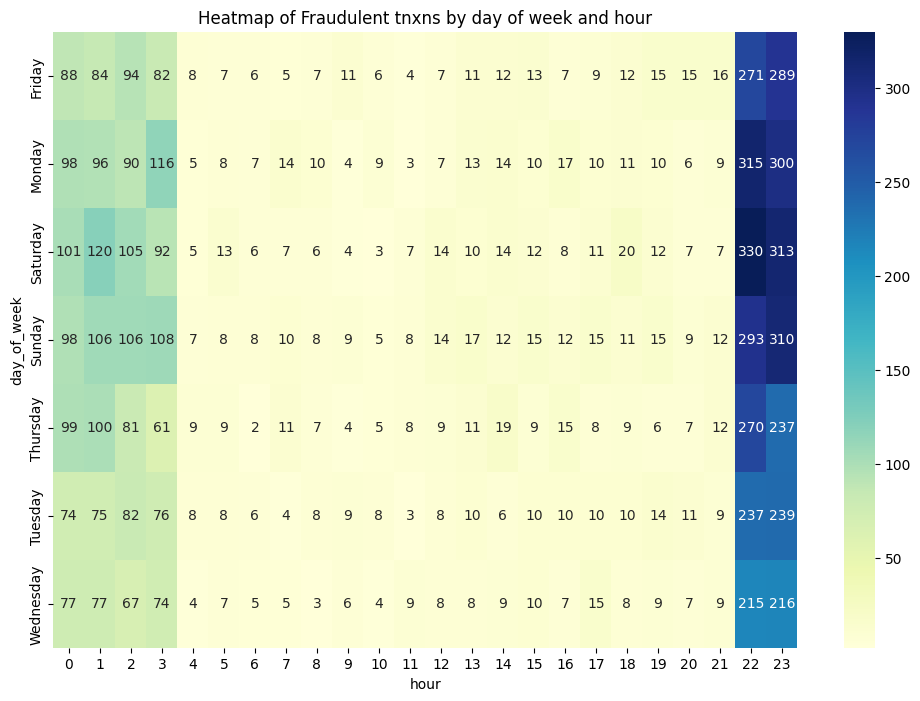

In [77]:
# Aggregate the data to get counts of fraud incidents by day of week and hour
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by day of week and hour')
plt.xlabel('hour')
plt.ylabel('day_of_week')

plt.show()

#### Observations
1. Like it was said before, 22 and 23 are most fradulent hours, 0-3 too but less
2. Must fradulent days are Saturday, Sunday and Monday

### 1.3.2 Heatmap Year vs MonthClaimed

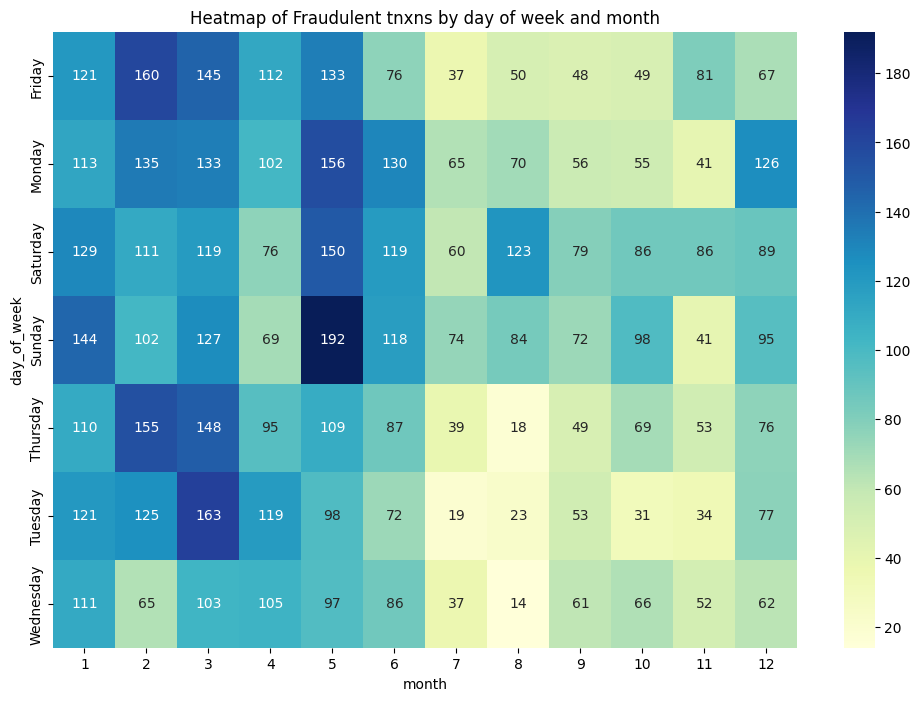

In [78]:
# Aggregate the data to get counts of fraud incidents by day of week and hour
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['day_of_week', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by day of week and month')
plt.xlabel('month')
plt.ylabel('day_of_week')

plt.show()

#### Observations
1. Not a lot of indication, but it seems that the beginning of the year is more fradulent, but we also so that these months had more transactions

#### 1.3.3.1 Heatmap Category vs Amount bucket

C:\Users\atans\AppData\Local\Temp\ipykernel_22728\2221991698.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = fraud_data.groupby(['category', 'AmountBucket']).size().unstack(fill_value=0)


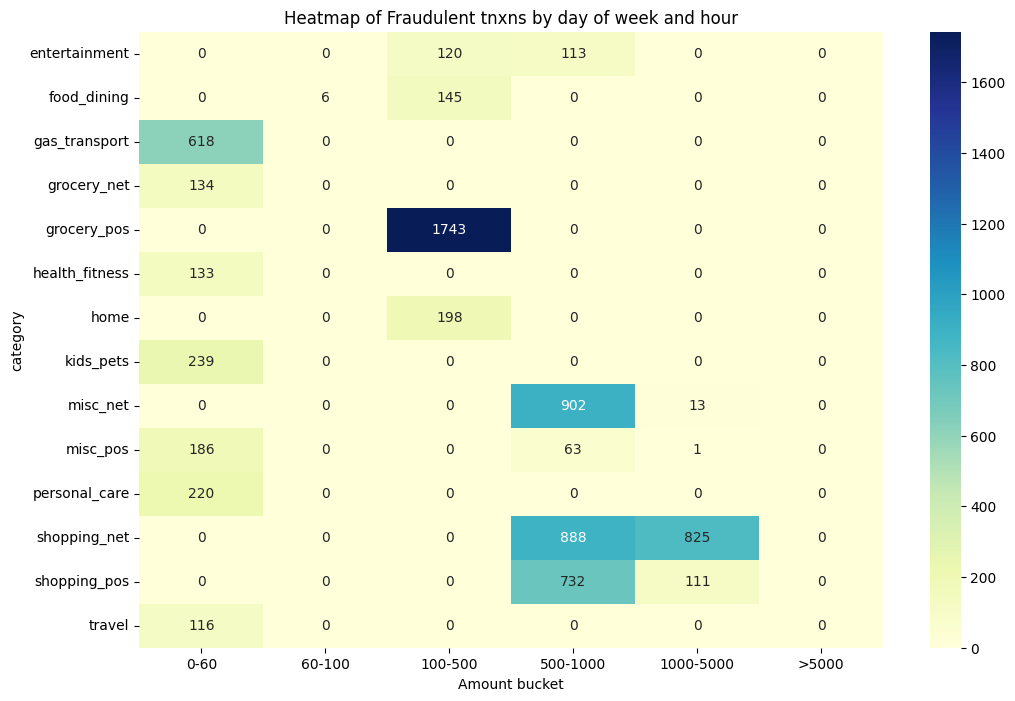

In [79]:
# Aggregate the data to get counts of fraud incidents by amount bucket and category
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['category', 'AmountBucket']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by day of week and hour')
plt.xlabel('Amount bucket')
plt.ylabel('category')

plt.show()

#### Observations
1. Entertainment is fraudulent in 100-1000 buckets
2. grocery_pos is the most fraudulent category and in only 500-1000 bucket
3. misc_net has a decent amount of fraud in 1 bucket only - 500-1000
4. shopping_net and shopping_pos are quite fradulent in 2 buckets 500-1000 and 1000-5000
5. 0-60 bucket is quite fraudulent

#### 1.3.3.2 Heatmap Category vs Amount bucket (extended buckets)

In [80]:
# Assuming 'amt' is your column name
amounts_extended = credit_cards['amt']

# Define the bins and corresponding labels
bins = [0, 25, 50, 75, 100, 250, 350, 500, 750, 875, 1000, 1250, 1500, 2000, 3500, 5000, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-250', '250-350', '350-500', '500-750', '750-850', '850-1000', '1000-1250', '1250-1500', '1500-2000', '2000-3500', '3500-5000', '>5000']

# Apply the binning
credit_cards['amt_binned_extended'] = pd.cut(amounts_extended, bins=bins, labels=labels, right=False)

C:\Users\atans\AppData\Local\Temp\ipykernel_22728\508975071.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = fraud_data.groupby(['category', 'amt_binned_extended']).size().unstack(fill_value=0)


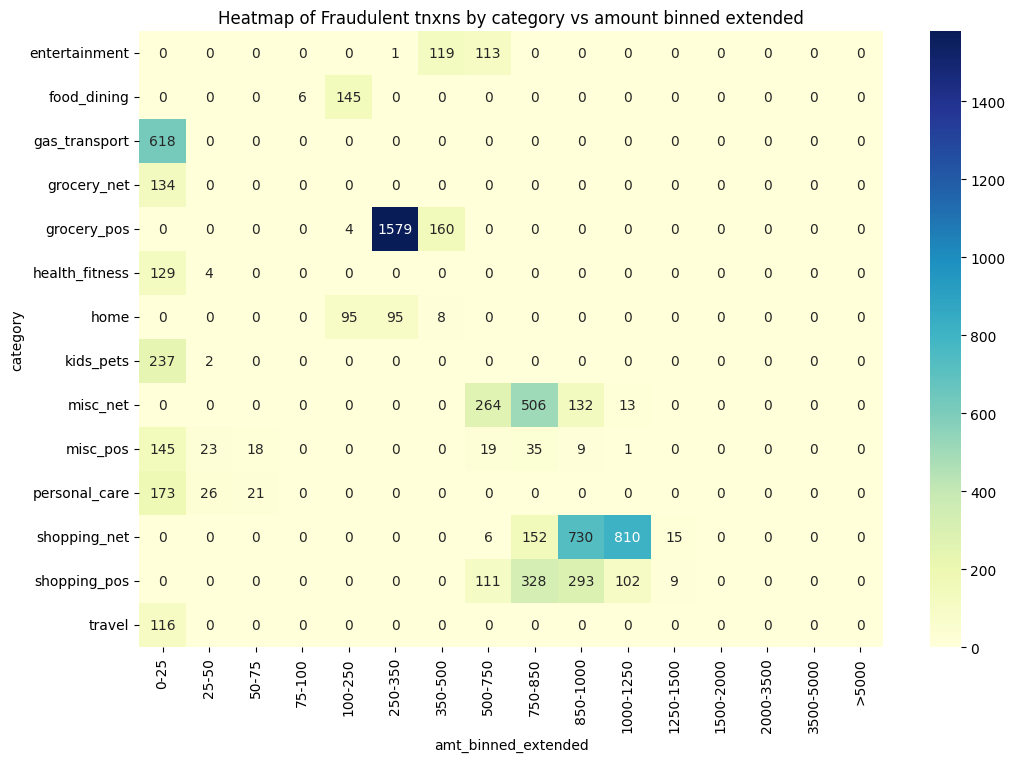

In [81]:
# Aggregate the data to get counts of fraud incidents by amount bucket and category
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['category', 'amt_binned_extended']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by category vs amount binned extended')
plt.xlabel('amt_binned_extended')
plt.ylabel('category')

plt.show()

#### 1.3.3.3 Heatmap Category vs bucketing, all transactions

C:\Users\atans\AppData\Local\Temp\ipykernel_22728\4094555163.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = credit_cards.groupby(['category', 'amt_binned_extended']).size().unstack(fill_value=0)


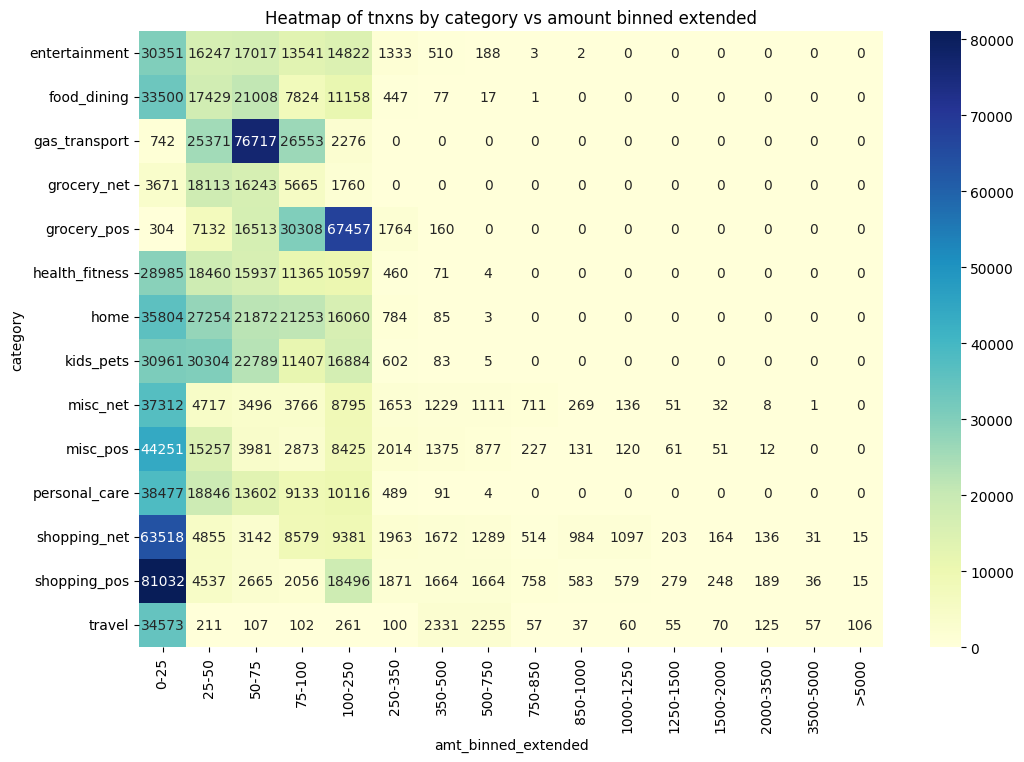

In [82]:
# Aggregate the data to get counts of fraud incidents by amount bucket extended and category

counts = credit_cards.groupby(['category', 'amt_binned_extended']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of tnxns by category vs amount binned extended')
plt.xlabel('amt_binned_extended')
plt.ylabel('category')

plt.show()

#### Observations
1. It looks like making bins broader helps seeing the full picture
2. It has to be found out if applying bins will help identifying fraud

### 1.3.4 Heatmap State vs Month

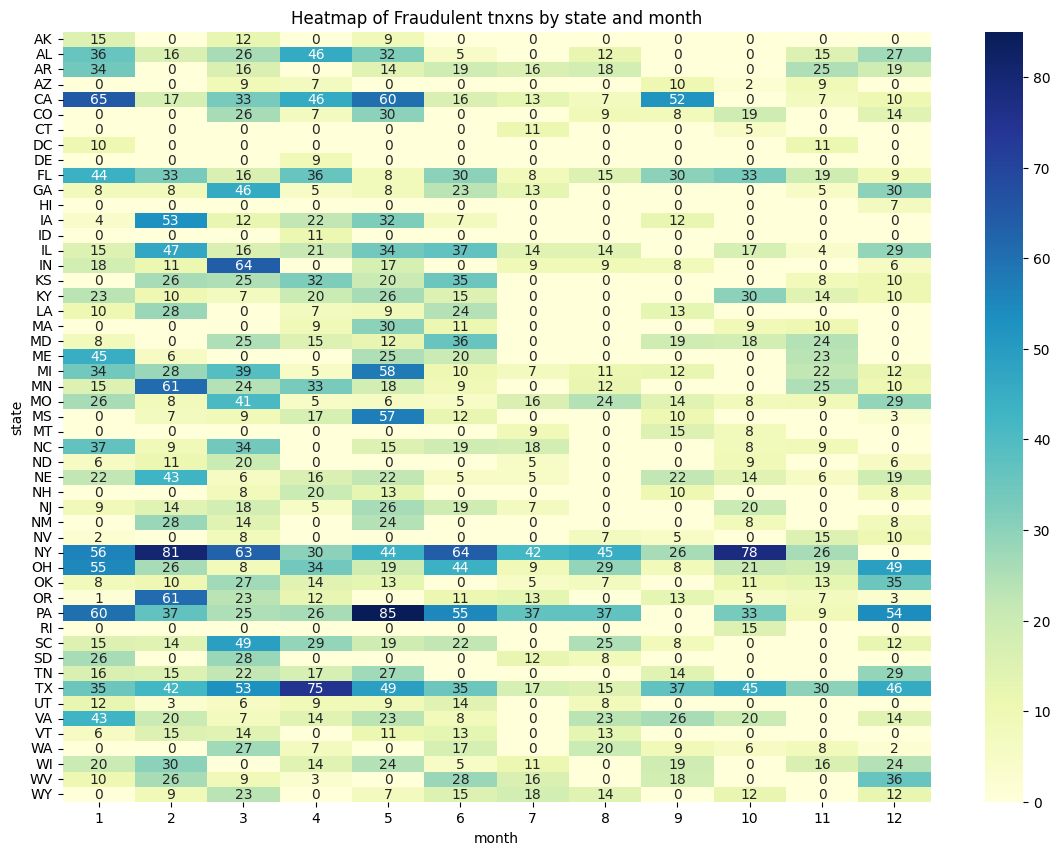

In [83]:
## Aggregate the data to get counts of fraud incidents by amount State and Month
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['state', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by state and month')
plt.xlabel('month')
plt.ylabel('state')

plt.show()

#### Observations
1. We see again a few quite fraudulent states throughout the year, like NY, PA, TX, OH

### 1.3.5 Heatmap State vs day of week

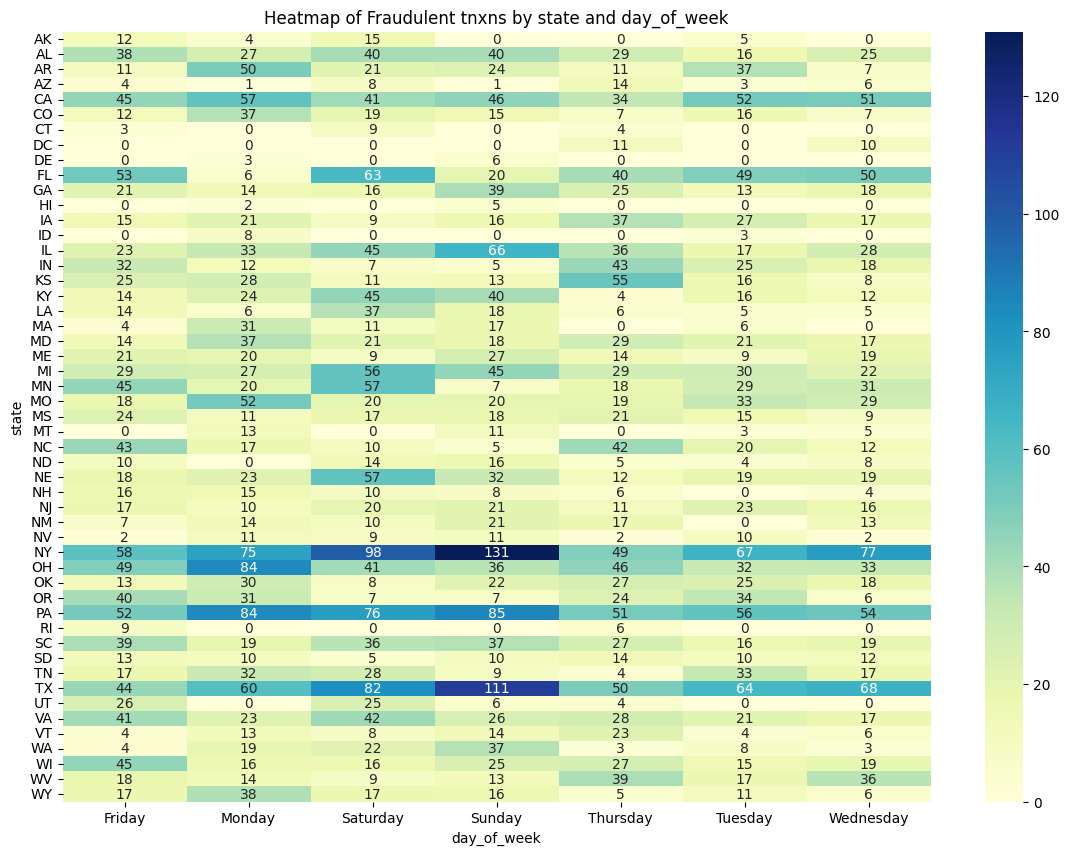

In [84]:
## Aggregate the data to get counts of fraud incidents by amount State and day_of_week
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts = fraud_data.groupby(['state', 'day_of_week']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by state and day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('state')

plt.show()

#### Observations
1. Same story, those 4 most fraudulent states

### 1.3.6 Heatmap Gender vs Category

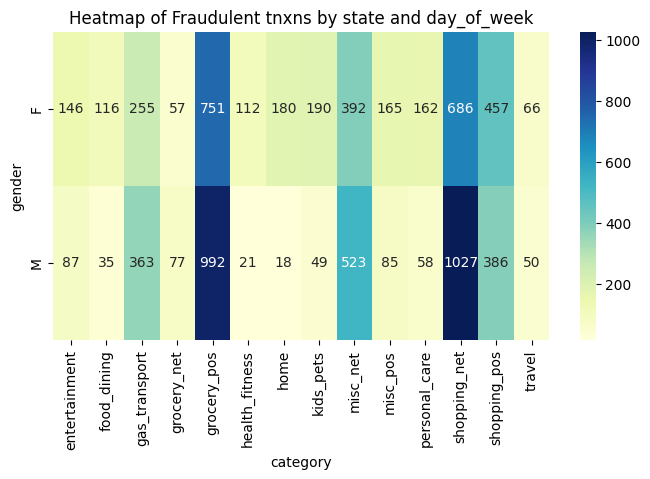

In [85]:
## Aggregate the data to get counts of fraud incidents by amount gender and category
fraud_data = credit_cards[credit_cards['is_fraud']==1]
fraud_counts = fraud_data.groupby(['gender', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by state and day_of_week')
plt.xlabel('category')
plt.ylabel('gender')

plt.show()

#### Observations
1. Males are significantly more dominant in grocery_pos and shopping_net categories with fraud
2. gas_transport and misc_net are taken up by men with more fraud
3. The rest of the categories are presented more by Females (in terms of fraud)

### 1.3.7 Heatmap Merchant Latitude vs Merchant longitude

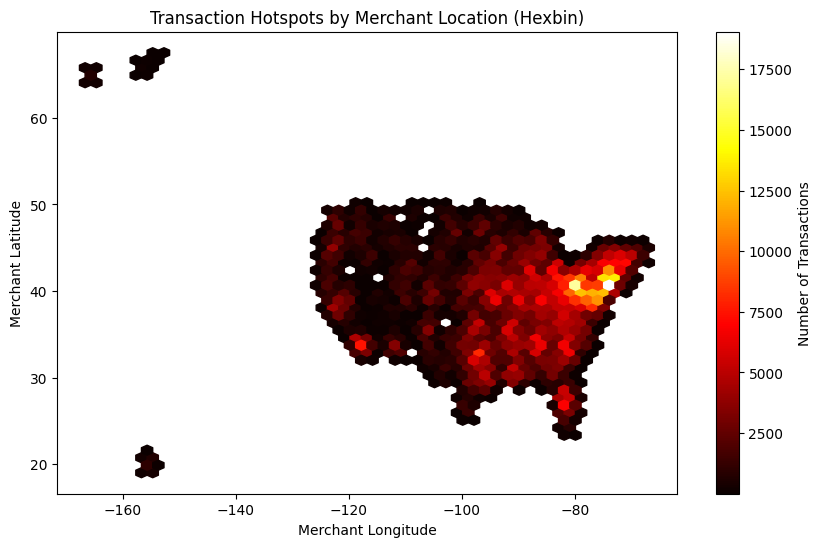

In [86]:
#Let's plot the map of transactions for merchant locations
longitudes = credit_cards['merch_long']
latitudes = credit_cards['merch_lat']
plt.figure(figsize=(10, 6))
plt.hexbin(longitudes, latitudes, gridsize=50, cmap='hot', mincnt=1)

plt.colorbar(label='Number of Transactions')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Transaction Hotspots by Merchant Location (Hexbin)')

plt.show()

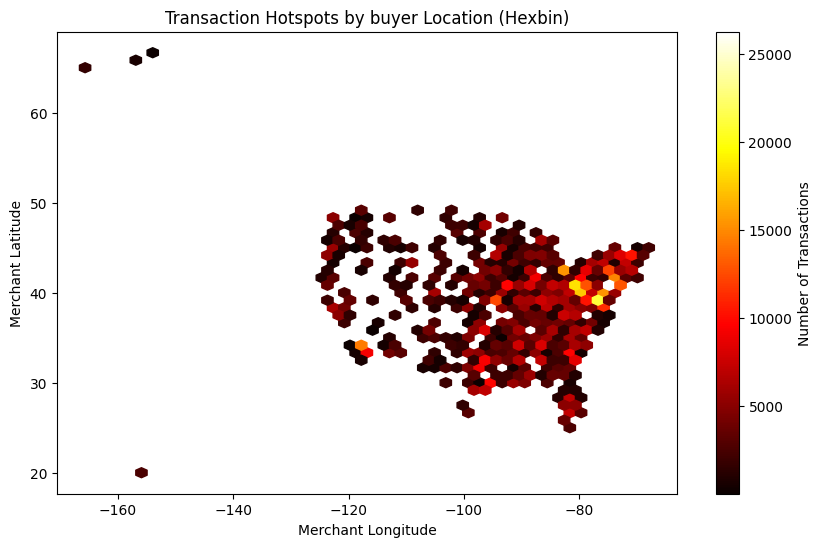

In [87]:
#Let's plot the map of transactions for merchant locations
longitudes = credit_cards['long']
latitudes = credit_cards['lat']
plt.figure(figsize=(10, 6))
plt.hexbin(longitudes, latitudes, gridsize=50, cmap='hot', mincnt=1)

plt.colorbar(label='Number of Transactions')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Transaction Hotspots by buyer Location (Hexbin)')

plt.show()

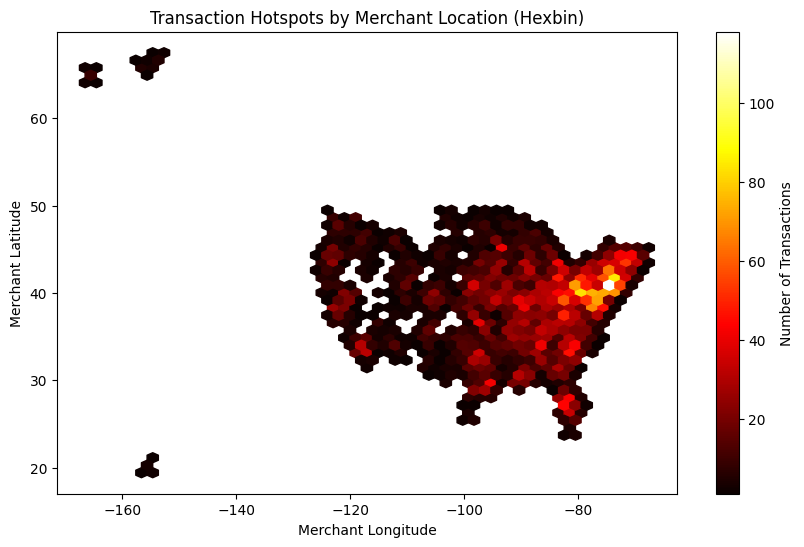

In [88]:
#Let's plot the map of fraud for merchant locations
longitudes = credit_cards[credit_cards['is_fraud']==1]['merch_long']
latitudes = credit_cards[credit_cards['is_fraud']==1]['merch_lat']
plt.figure(figsize=(10, 6))
plt.hexbin(longitudes, latitudes, gridsize=50, cmap='hot', mincnt=1)

plt.colorbar(label='Number of Transactions')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Transaction Hotspots by Merchant Location (Hexbin)')

plt.show()

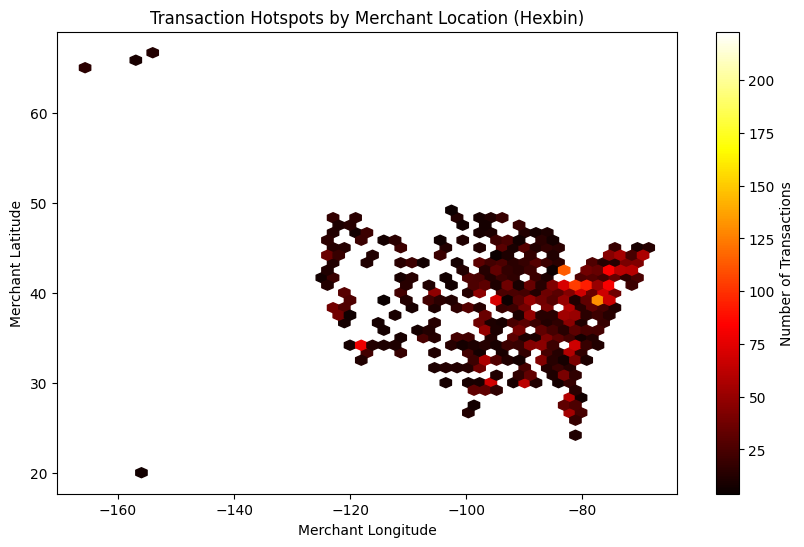

In [89]:
#Let's plot the map of fraud for buyer locations
longitudes = credit_cards[credit_cards['is_fraud']==1]['long']
latitudes = credit_cards[credit_cards['is_fraud']==1]['lat']
plt.figure(figsize=(10, 6))
plt.hexbin(longitudes, latitudes, gridsize=50, cmap='hot', mincnt=1)

plt.colorbar(label='Number of Transactions')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.title('Transaction Hotspots by Merchant Location (Hexbin)')

plt.show()

### 1.3.8 Heatmap Gender vs Age

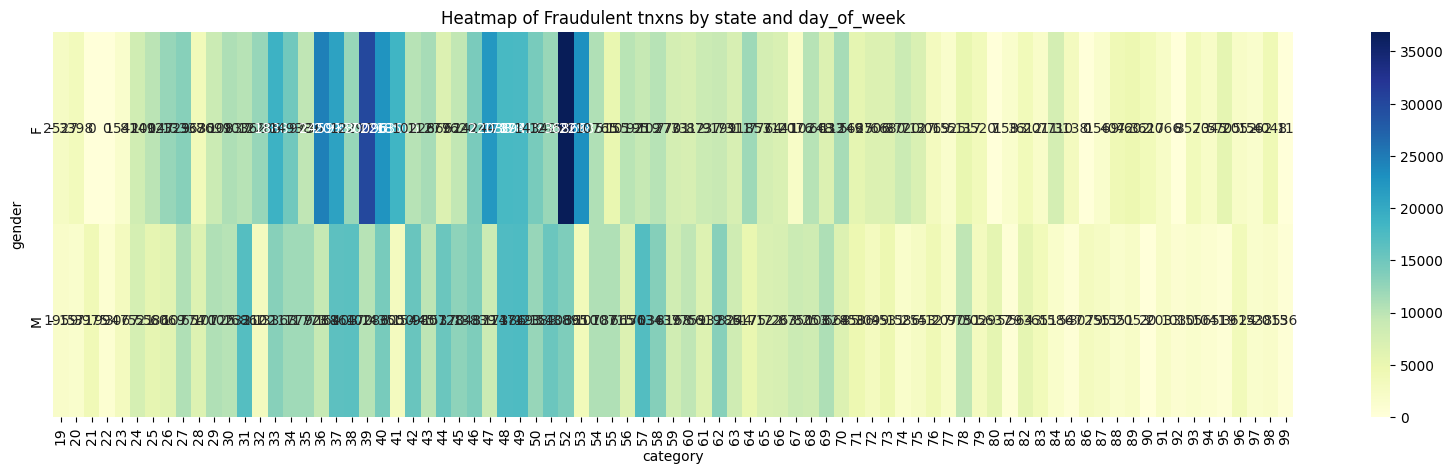

In [90]:
## Aggregate the data to get counts of incidents by amount gender and category
counts_gender_age = credit_cards.groupby(['gender', 'age']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 5))
sns.heatmap(counts_gender_age, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by state and day_of_week')
plt.xlabel('category')
plt.ylabel('gender')

plt.show()

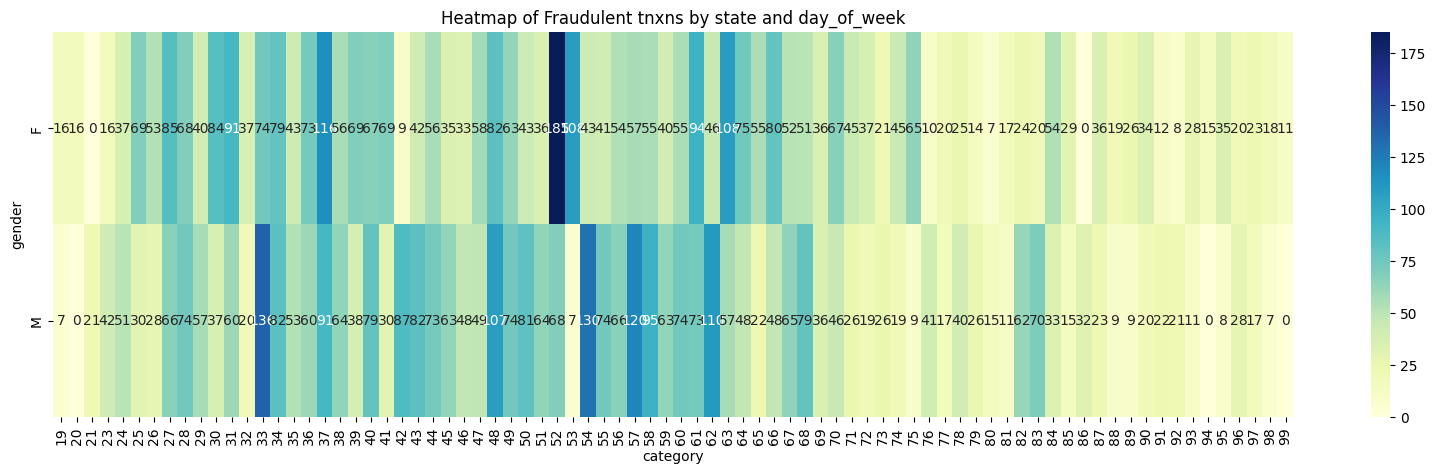

In [91]:
## Aggregate the data to get counts of fraud incidents by amount gender and category
fraud_data = credit_cards[credit_cards['is_fraud']==1]
fraud_counts_gender_age = fraud_data.groupby(['gender', 'age']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 5))
sns.heatmap(fraud_counts_gender_age, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by state and day_of_week')
plt.xlabel('category')
plt.ylabel('gender')

plt.show()

#### Observations
1. It's hardly possible to see any insights here

### 1.3.9 Heatmap Age vs amount bucket

C:\Users\atans\AppData\Local\Temp\ipykernel_22728\2120804384.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_age_bucket = credit_cards.groupby(['age', 'amt_binned_extended']).size().unstack(fill_value=0)


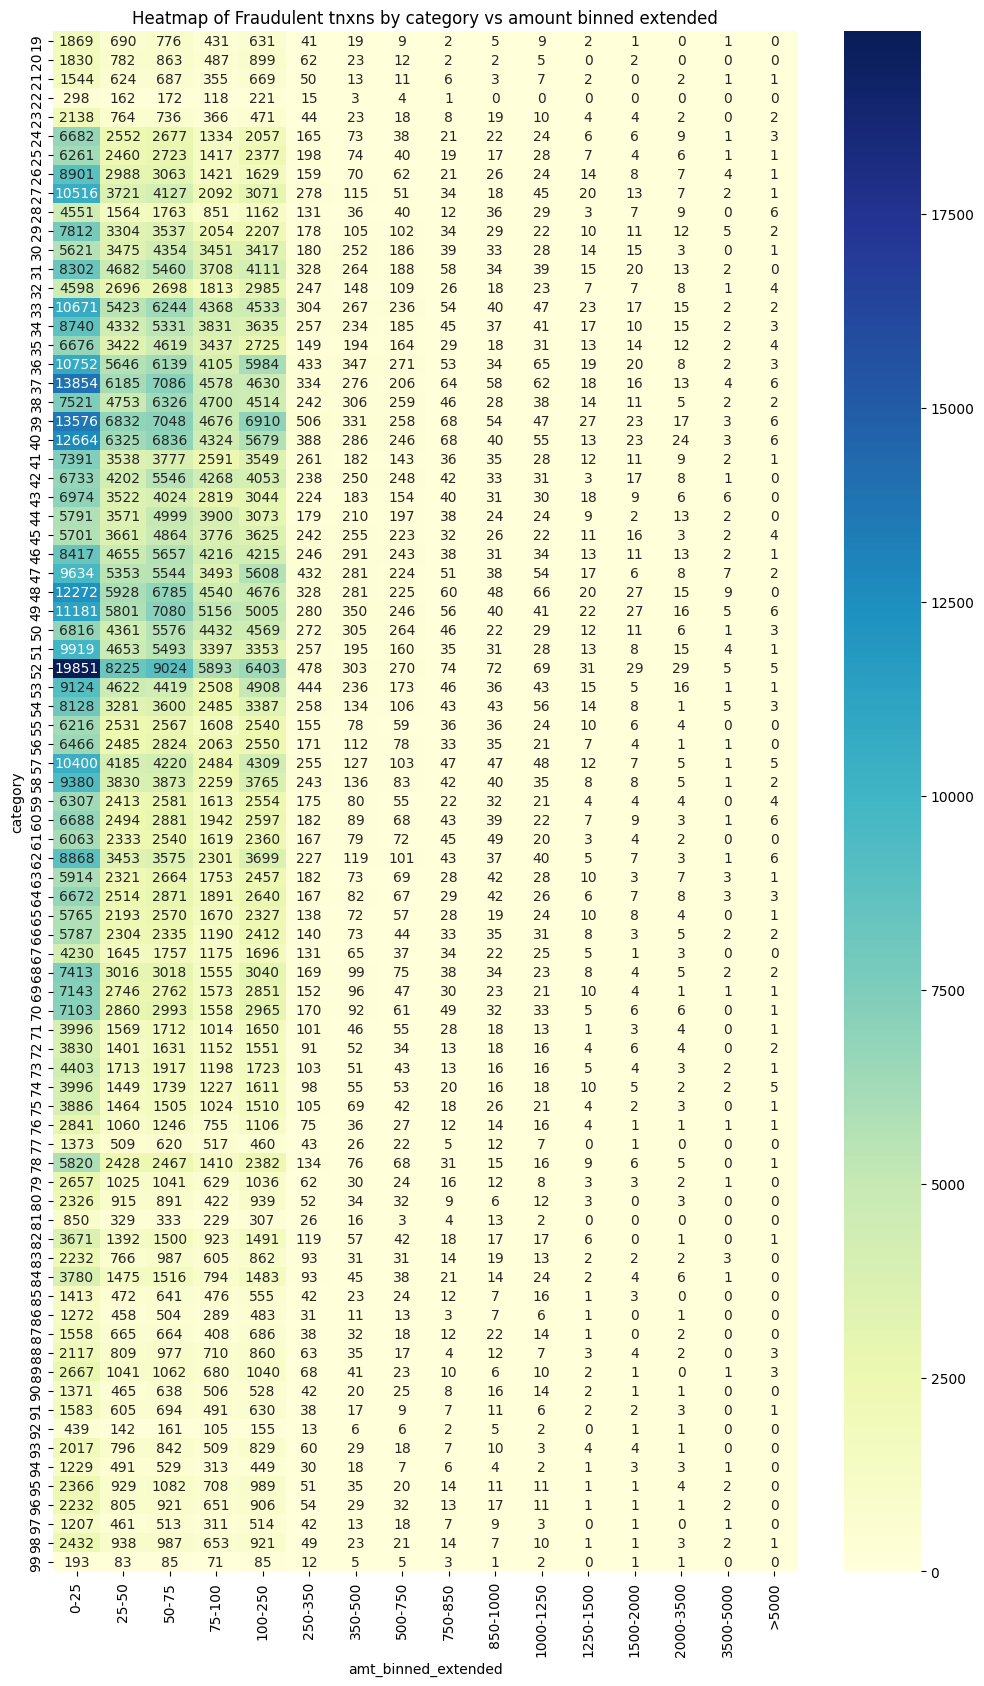

In [92]:
# Aggregate the data to get counts by amount bucket and age

counts_age_bucket = credit_cards.groupby(['age', 'amt_binned_extended']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 20))
sns.heatmap(counts_age_bucket, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by category vs amount binned extended')
plt.xlabel('amt_binned_extended')
plt.ylabel('category')

plt.show()

C:\Users\atans\AppData\Local\Temp\ipykernel_22728\3975699740.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_age_bucket = fraud_data.groupby(['age', 'amt_binned_extended']).size().unstack(fill_value=0)


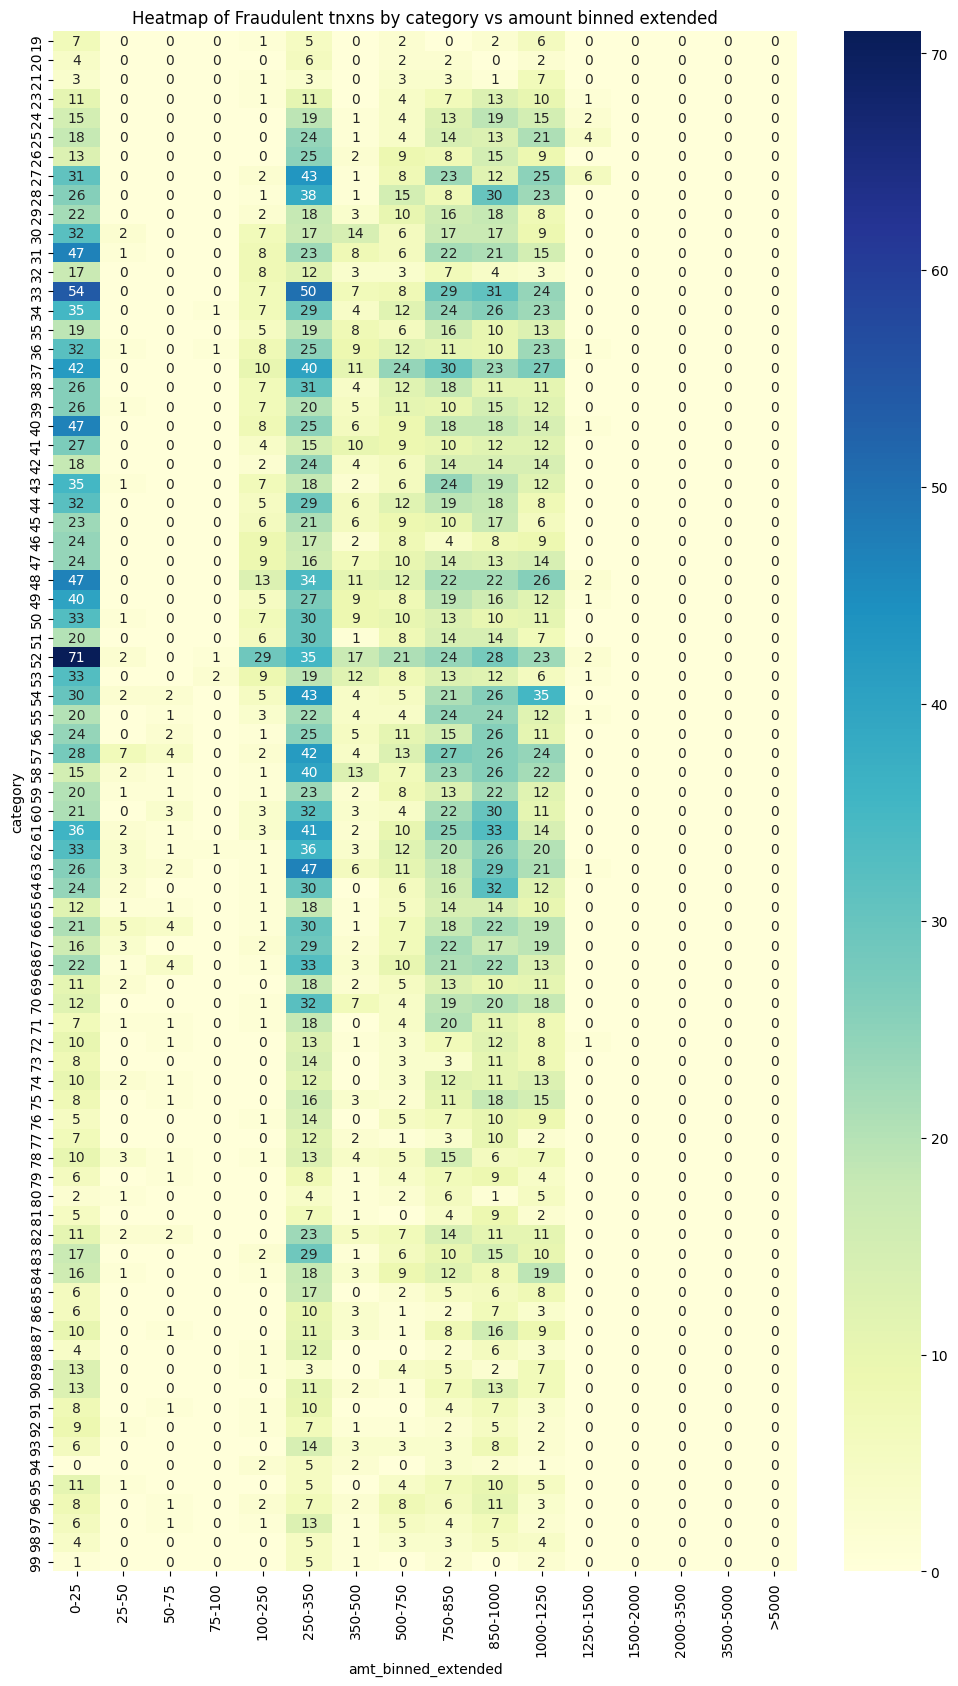

In [93]:
# Aggregate the data to get counts of fraud incidents by amount bucket and category
fraud_data = credit_cards[credit_cards['is_fraud']==1]

fraud_counts_age_bucket = fraud_data.groupby(['age', 'amt_binned_extended']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 20))
sns.heatmap(fraud_counts_age_bucket, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraudulent tnxns by category vs amount binned extended')
plt.xlabel('amt_binned_extended')
plt.ylabel('category')

plt.show()

#### Observations
1. From the distribution of all transactions we do see that most of the txnxs are conducted by users from 24-70 and from 0 to 250$
2. Most of the transactions fall into 0-25 bucket
3. A lot of fraud fall into 250-1250 range which is interesting, we'll see how the model is able to catch that and what to do this 0-25 bucket

# Bottom line

1. We have no Nones in our data
2. No values have to be filled or replaced
3. The following columns will be dropped as they are useless: 'cc_num', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num'
4. Encoding: 
    1. Category - one hot encoding;
    2. Gender - one hot encoding;
    3. Job - ?
    4. Merchant - ?
    5. State - one hot encoding
    6. City - ?
5. Feature engineering:
    1. Month of transaction
    2. Day of week of transaction and then one hot encoding
    3. Hour of transaction
    4. Age from dob and no further actions
    5. City-pop bucketing and then one hot encoding ask GPT
    6. Amount bucketing and then one hot encoding ask GPT
    7. Lenght of card number 
6. Do we need the city and state of merchant?
7. Can we do something with longitudes and latitudes?